In [1]:
# EDA on Dataset

In [2]:
# import 
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [3]:
# Load R1_link_main_list_df.csv file
link_main_list_df = pd.read_csv('C:\\Users\\Admin\\R1_link_main_list_df.csv')
# Take a look at the datatypes
link_main_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Web_link       1000 non-null   object 
 2   Property_Name  1000 non-null   object 
 3   price          1000 non-null   int64  
 4   no_of_bedrms   1000 non-null   int64  
 5   no_of_bathrms  1000 non-null   int64  
 6   Floor_Area     1000 non-null   int64  
 7   Type           733 non-null    object 
 8   Age            612 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [4]:
# remove 'Unnamed: 0' column
link_main_list_df = link_main_list_df.drop('Unnamed: 0', axis = 1)

In [5]:
link_main_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Web_link       1000 non-null   object 
 1   Property_Name  1000 non-null   object 
 2   price          1000 non-null   int64  
 3   no_of_bedrms   1000 non-null   int64  
 4   no_of_bathrms  1000 non-null   int64  
 5   Floor_Area     1000 non-null   int64  
 6   Type           733 non-null    object 
 7   Age            612 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [6]:
# remove NA rows
link_main_list_df = link_main_list_df.dropna()

In [7]:
link_main_list_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 2 to 988
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Web_link       612 non-null    object 
 1   Property_Name  612 non-null    object 
 2   price          612 non-null    int64  
 3   no_of_bedrms   612 non-null    int64  
 4   no_of_bathrms  612 non-null    int64  
 5   Floor_Area     612 non-null    int64  
 6   Type           612 non-null    object 
 7   Age            612 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 43.0+ KB


In [8]:
# double check NA items
link_main_list_df.head()

,Web_link,Property_Name,price,no_of_bedrms,no_of_bathrms,Floor_Area,Type,Age
2,https://www.propertyguru.com.sg/listing/231793...,The Estuary @ Yishun,1550000,4,3,1528,Condominium,7.0
3,https://www.propertyguru.com.sg/listing/hdb-fo...,670B Edgefield Plains,450000,3,2,1001,HDB,5.0
4,https://www.propertyguru.com.sg/listing/223352...,Toh Close,3900000,5,5,4553,Semi-Detached House,9.0
5,https://www.propertyguru.com.sg/listing/216058...,Goodwood Residence,2880000,2,2,1120,Condominium,7.0
7,https://www.propertyguru.com.sg/listing/208917...,Draycott Eight,2680000,2,2,1485,Condominium,14.0


In [9]:

link_main_list_df.columns = link_main_list_df.columns.map(str.strip)
link_main_list_df.columns

Index(['Web_link', 'Property_Name', 'price', 'no_of_bedrms', 'no_of_bathrms',
       'Floor_Area', 'Type', 'Age'],
      dtype='object')

In [10]:
# check number of rows and columns 
link_main_list_df.shape

(612, 8)

In [11]:
# examine correlations
link_main_list_df.corr()

,price,no_of_bedrms,no_of_bathrms,Floor_Area,Age
price,1.000000,0.417241,0.611283,0.698385,-0.093307
no_of_bedrms,0.417241,1.000000,0.836503,0.768627,0.173420
no_of_bathrms,0.611283,0.836503,1.000000,0.855492,0.027239
Floor_Area,0.698385,0.768627,0.855492,1.000000,0.078674
Age,-0.093307,0.173420,0.027239,0.078674,1.000000


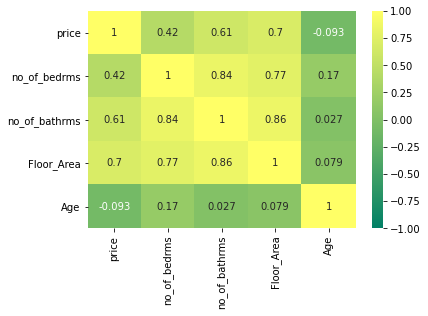

In [13]:
# generate heat map
sns.heatmap(link_main_list_df.corr(), cmap="summer", annot=True, vmin=-1, vmax=1);


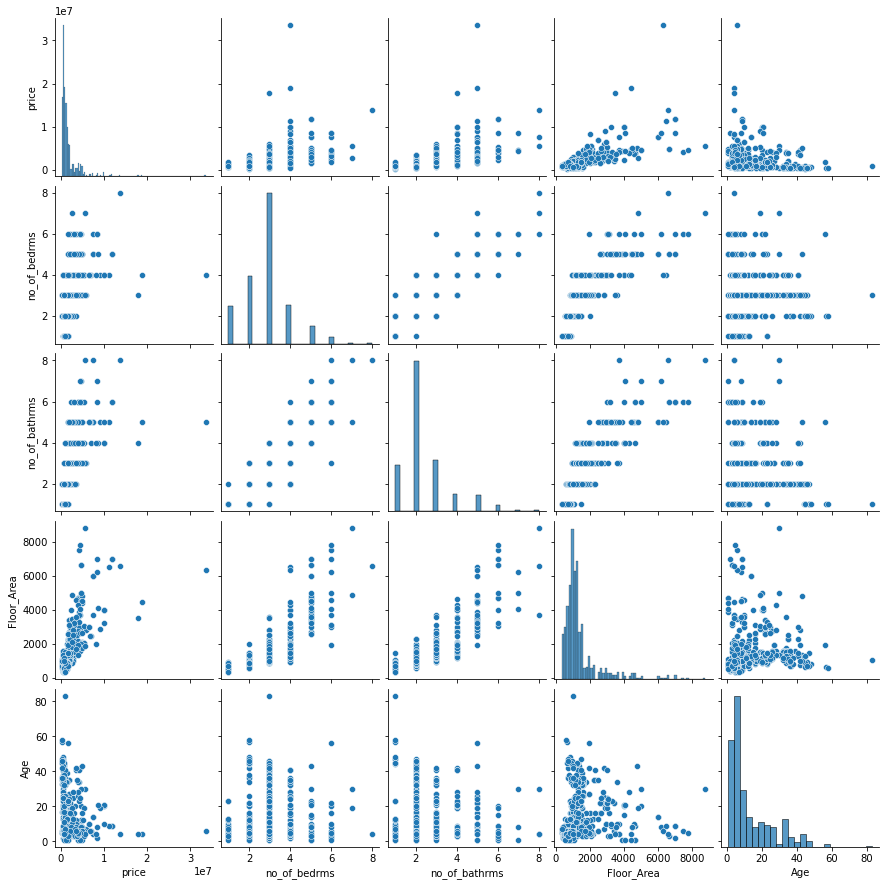

In [13]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(link_main_list_df);


In [14]:
link_main_list_df.corr()['price'].sort_values(ascending=False)

price            1.000000
Floor_Area       0.698385
no_of_bathrms    0.611283
no_of_bedrms     0.417241
Age             -0.093307
Name: price, dtype: float64

In [56]:
# Put our model together
lm1 = smf.ols('price ~ Floor_Area + no_of_bathrms + no_of_bedrms + Age', data=link_main_list_df)

# Fit the model
fit1 = lm1.fit()

# Display summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          9.71e-105
Time:                        01:25:48   Log-Likelihood:                -9618.5
No. Observations:                 612   AIC:                         1.925e+04
Df Residuals:                     607   BIC:                         1.927e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.151e+05   2.02e+05      4.040      0.000    4.19e+05    1.21e+06
Floor_Area     1526.5765    108.392     14.084      0.000    1313.708    1739.445
no_of_bathrms   5.98e+05   1.25e+05      4.792      0.000    3.53e+05    8.43e+05
no_of_bedrms  -8.591e+05   1.12e+05     -7.670      0.000   -1.08e+06   -6.39e+05
Age           -1.793e+04   5547.079     -3.232      0.001   -2.88e+04   -7033.729
==============================================================================
Omnibus:                      792.967   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186248.788
Skew:                           6.281   Prob(JB):                         0.00
Kurtosis:                      87.534   Cond. No.                     6.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

NameError: name 'fit' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
link_main_list_df['log_price']=np.log(link_main_list_df['price'])

In [ ]:
link_main_list_df.info()

In [ ]:
# Repeat with Log of Price

lm1 = smf.ols('log_price ~ Floor_Area + no_of_bathrms + no_of_bedrms + Age', data=link_main_list_df)
     

fit1 = lm1.fit()


fit1.summary()

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [ ]:
link_main_list_df.info()

In [ ]:
link_main_list_df['log_Floor_Area']=np.log(link_main_list_df['Floor_Area'])

In [ ]:
# Repeat with Log of Price and Log of Floor Area

lm1 = smf.ols('log_price ~ log_Floor_Area + no_of_bathrms + no_of_bedrms + Age', data=link_main_list_df)
     

fit1 = lm1.fit()


fit1.summary()

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [ ]:
link_main_list_df.to_csv('clean_link_main_list_df.csv')

In [ ]:
# Repeat removing Age
lm1 = smf.ols('log_price ~ log_Floor_Area + no_of_bathrms + no_of_bedrms', data = link_main_list_df)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [ ]:
# Repeat removing no of bedrooms and Age
lm1 = smf.ols('log_price ~ log_Floor_Area + no_of_bathrms', data = link_main_list_df)

# Fit the model
fit2 = lm1.fit()

# Print summary statistics of the model's performance
fit2.summary()

In [ ]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid);

In [ ]:
# Start with  empty model
lr = LinearRegression()

# include all my features
X = link_main_list_df[['Floor_Area','no_of_bathrms','no_of_bedrms', 'Age']]

# my target is Price
y = link_main_list_df[['price']]

# Fit the model
lr.fit(X, y)

# display R2, intercept and Coefficient
print(lr.score(X,y))

print(lr.intercept_)

print(lr.coef_)


In [ ]:
# Try again without Age
lr = LinearRegression()

X = link_main_list_df[['Floor_Area','no_of_bathrms','no_of_bedrms']]


y = link_main_list_df[['price']]


lr.fit(X, y)


lr.score(X,y)

print(lr.intercept_)

print(lr.coef_)

In [ ]:
# Improving the by putting more Data (Type)

In [92]:
link_main_list_df.columns

Index(['Web_link', 'Property_Name', 'price', 'no_of_bedrms', 'no_of_bathrms',
       'Floor_Area', 'Type', 'Age'],
      dtype='object')

In [93]:
link_main_list_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 2 to 988
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Web_link       612 non-null    object 
 1   Property_Name  612 non-null    object 
 2   price          612 non-null    int64  
 3   no_of_bedrms   612 non-null    int64  
 4   no_of_bathrms  612 non-null    int64  
 5   Floor_Area     612 non-null    int64  
 6   Type           612 non-null    object 
 7   Age            612 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 63.0+ KB


In [97]:
#Creating a subset of all numeric dataframe 
subset=['price', 'no_of_bedrms', 'no_of_bathrms',
       'Floor_Area', 'Age']


link_main_list_df2 = link_main_list_df[subset]

In [100]:
link_main_list_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 2 to 988
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          612 non-null    float64
 1   no_of_bedrms   612 non-null    int64  
 2   no_of_bathrms  612 non-null    int64  
 3   Floor_Area     612 non-null    int64  
 4   Age            612 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 48.7 KB


In [99]:

link_main_list_df2['price']=link_main_list_df['price'].astype(float)



C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:

link_main_list_df2['log_price'] = link_main_list_df['price'].apply(np.log)


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
# Let's add 'make'
print(df.make.value_counts())
print('\n')
print(len(df.make.value_counts()))

NameError: name 'df' is not defined

In [103]:
# Add 'Type' to our dataset
print(link_main_list_df.Type.value_counts())
print('\n')
print(len(link_main_list_df.Type.value_counts()))

Condominium              271
HDB                      199
Apartment                 64
Terraced House            19
Executive Condominium     19
Semi-Detached House       15
Corner Terrace            11
Detached House             7
Cluster House              3
Bungalow House             3
Walk-up                    1
Name: Type, dtype: int64


11


In [104]:
X = patsy.dmatrix('make',data=df,return_type='dataframe')
X.head()

NameError: name 'df' is not defined

In [105]:
# convert 'Type' to categorical variables

X = patsy.dmatrix('Type',data=link_main_list_df,return_type='dataframe')



In [106]:
X.head()

,Intercept,Type[T.Bungalow House],Type[T.Cluster House],Type[T.Condominium],Type[T.Corner Terrace],Type[T.Detached House],Type[T.Executive Condominium],Type[T.HDB],Type[T.Semi-Detached House],Type[T.Terraced House],Type[T.Walk-up]
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
link_main_list_df2 = link_main_list_df2.join(X)

In [108]:
import statsmodels.api as sm

y = link_main_list_df2.log_price
x = link_main_list_df2.drop(['log_price', 'price'], 1)

lsm = sm.OLS(y,x)

fit = lsm.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.47e-206
Time:                        02:12:46   Log-Likelihood:                -213.86
No. Observations:                 612   AIC:                             457.7
Df Residuals:                     597   BIC:                             524.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
no_of_bedrms                      0.0356      0.029      1.224      0.222      -0.022       0.093
no_of_bathrms                     0.1423      0.030      4.765      0.000       0.084       0.201
Floor_Area                        0.0004   3.17e-05     11.996      0.000       0.000       0.000
Age                              -0.0020      0.001     -1.541      0.124      -0.004       0.001
Intercept                        13.4667      0.060    225.463      0.000      13.349      13.584
Type[T.Bungalow House]           -0.3785      0.227     -1.667      0.096      -0.824       0.067
Type[T.Cluster House]            -0.8079      0.214     -3.780      0.000      -1.228      -0.388
Type[T.Condominium]              -0.0508      0.048     -1.048      0.295      -0.146       0.044
Type[T.Corner Terrace]           -0.7809      0.127     -6.129      0.000      -1.031      -0.531
Type[T.Detached House]           -0.5827      0.169     -3.454      0.001      -0.914      -0.251
Type[T.Executive Condominium]    -0.4649      0.093     -4.994      0.000      -0.648      -0.282
Type[T.HDB]                      -0.9561      0.056    -17.068      0.000      -1.066      -0.846
Type[T.Semi-Detached House]      -0.9564      0.133     -7.195      0.000      -1.217      -0.695
Type[T.Terraced House]           -0.7569      0.104     -7.272      0.000      -0.961      -0.552
Type[T.Walk-up]                  -0.6827      0.362     -1.883      0.060      -1.395       0.029
==============================================================================
Omnibus:                       39.875   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.175
Skew:                           0.084   Prob(JB):                     1.49e-33
Kurtosis:                       5.429   Cond. No.                     4.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
link_main_list_df2.to_csv('main_list_Type.CSV')